<a href="https://colab.research.google.com/github/namra98/Deep-Learning/blob/master/ML_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df1= pd.read_excel('/content/drive/My Drive/Acadamics/IE406/ex2data1-logistic.xls')
df2= pd.read_excel('/content/drive/My Drive/Acadamics/IE406/ex2data2-logistic.xls')

df1.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [126]:
df2.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


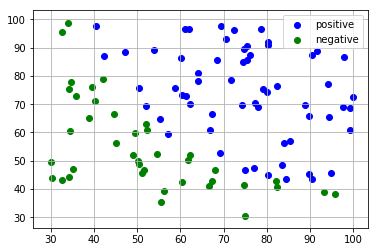

In [128]:
Xpos = df1.loc[df1['y']==1][['x1','x2']]
Xneg = df1.loc[df1['y']==0][['x1','x2']]

fig, ax = plt.subplots()
ax.scatter(Xpos.loc[:]['x1'].values,Xpos.loc[:]['x2'].values,c='blue',label='positive')
ax.scatter(Xneg.loc[:]['x1'].values,Xneg.loc[:]['x2'].values,c='green',label='negative')
ax.legend()
ax.grid(True)
plt.show()

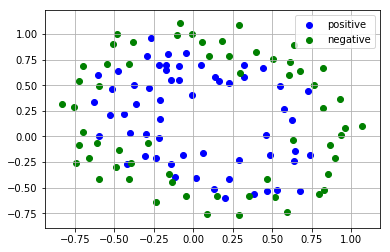

In [129]:
Xpos2 = df2.loc[df2['y']==1][['x1','x2']]
Xneg2 = df2.loc[df2['y']==0][['x1','x2']]
fig, ax = plt.subplots()
ax.scatter(Xpos2.loc[:]['x1'].values,Xpos2.loc[:]['x2'].values,c='blue',label='positive')
ax.scatter(Xneg2.loc[:]['x1'].values,Xneg2.loc[:]['x2'].values,c='green',label='negative')
ax.legend()
ax.grid(True)
plt.show()

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def logistic_cost(y_actual,y_predicted):
  return np.sum(((-y_actual*np.log(y_predicted)) - ((1-y_actual)*np.log(1-y_predicted))))/y_predicted.shape[0]

def logistic_output(X,theta):
  t = sigmoid(np.dot(X,theta))
  for i in range(t.shape[0]):
    if(t[i]<0.5):
      t[i]=0
    else:
      t[i]=1
  return t

In [0]:
def logistic_gradient_descent(X,Y,rate):
  epochs = 100000
  alphas = [rate]
  for alpha in alphas:
    theta = np.zeros((3,1))
    x0 = X[:,0]*theta[0]
    x1 = X[:,1]*theta[1]
    x2 = X[:,2]*theta[2]
    h = sigmoid(x0+x1+x2)
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        x0 = X[:,0]*theta[0]
        x1 = X[:,1]*theta[1]
        x2 = X[:,2]*theta[2]
        h = sigmoid(x0+x1+x2)
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%10000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==rate):
      return theta

In [0]:
def perform_descent(df1,rate):
  msk = random.sample(range(0,100),int(len(df1)*90/100))
  vals = np.full((100,1),True)
  for i in msk:
    vals[i] = False
  train_df1 = df1[~vals]
  test_df1 = df1[vals]

  X = np.zeros((len(train_df1['x1']),3))
  X[:,0] = np.ones(len(train_df1['x1']))
  X[:,1] = train_df1['x1']
  X[:,2] = train_df1['x2']
  Y = train_df1['y']
  
  theta = logistic_gradient_descent(X,Y,rate)
  print(theta)
  
  X = np.zeros((len(test_df1['x1']),3))
  X[:,0] = np.ones(len(test_df1['x1']))
  X[:,1] = test_df1['x1']
  X[:,2] = test_df1['x2']
  Y = test_df1['y'].values

  x0 = X[:,0]*theta[0]
  x1 = X[:,1]*theta[1]
  x2 = X[:,2]*theta[2]
  h = sigmoid(x0+x1+x2)
  count=0
  for i in range(len(h)):
    if(h[i]<0.5 and Y[i]==0):
      count+=1
    elif(h[i]>=0.5 and Y[i]==1):
      count+=1
  acc = count/len(h)
  print(acc)
  return theta

Epoch :  0  Cost :  [0.63514309]
Epoch :  10000  Cost :  [0.59264426]
Epoch :  20000  Cost :  [0.55734744]
Epoch :  30000  Cost :  [0.52708322]
Epoch :  40000  Cost :  [0.5010188]
Epoch :  50000  Cost :  [0.47844771]
Epoch :  60000  Cost :  [0.45878294]
Epoch :  70000  Cost :  [0.44154254]
Epoch :  80000  Cost :  [0.42633318]
Epoch :  90000  Cost :  [0.41283431]


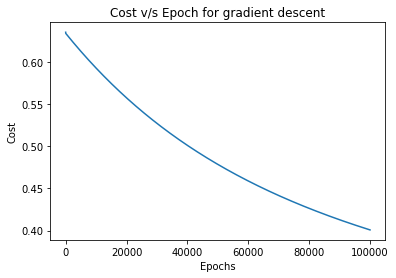

[[-4.73435044]
 [ 0.04253026]
 [ 0.03922348]]
1.0
[[-4.73435044]
 [ 0.04253026]
 [ 0.03922348]]


In [133]:
theta1 = perform_descent(df1,0.001)
print(theta1)

In [0]:
def logistic_gradient_descent(X,Y,rate):
  epochs = 100000
  alphas = [rate]
  for alpha in alphas:
    theta = np.zeros((3,1))
    x0 = X[:,0]*theta[0]
    x1 = X[:,1]**2 * theta[1]
    x2 = X[:,2]**2 * theta[2]
    h = sigmoid(x0+x1+x2)
    cost = np.random.random((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      theta[1] = theta[1] - alpha/X.shape[0] * np.sum((h-Y)*X[:,1]**2)
      theta[2] = theta[2] - alpha/X.shape[0] * np.sum((h-Y)*X[:,2]**2)
      x0 = X[:,0]*theta[0]
      x1 = X[:,1]**2 * theta[1]
      x2 = X[:,2]**2 * theta[2]
      h = sigmoid(x0+x1+x2)
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%10000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==rate):
      return theta

In [0]:
def perform_descent(df1,rate):
  print(df1.head())
  msk = random.sample(range(0,118),int(len(df1)*90/100))
  vals = np.full((118,1),True)
  for i in msk:
    vals[i] = False
  train_df1 = df1[~vals]
  test_df1 = df1[vals]

  X = np.zeros((len(train_df1['x1']),3))
  X[:,0] = np.ones(len(train_df1['x1']))
  X[:,1] = train_df1['x1']
  X[:,2] = train_df1['x2']
  Y = train_df1['y']
  
  theta = logistic_gradient_descent(X,Y,rate)
  print(theta)
  
  X = np.zeros((len(test_df1['x1']),3))
  X[:,0] = np.ones(len(test_df1['x1']))
  X[:,1] = test_df1['x1']
  X[:,2] = test_df1['x2']
  Y = test_df1['y'].values

  x0 = X[:,0]*theta[0]
  # x1 = X[:,1]*theta[1]
  # x2 = X[:,2]*theta[2]
  x1 = X[:,1]**2 * theta[1]
  x2 = X[:,2]**2 * theta[2]
  # x5 = np.dot(X[:,1],X[:,2]) * theta[5]
  h = sigmoid(x0+x1+x2)
  count=0
  for i in range(len(h)):
    if(h[i]<0.5 and Y[i]==0):
      count+=1
    elif(h[i]>=0.5 and Y[i]==1):
      count+=1
  acc = count/len(h)
  print(acc)
  return theta

In [90]:
len(df2)

118

         x1       x2  y
0  0.051267  0.69956  1
1 -0.092742  0.68494  1
2 -0.213710  0.69225  1
3 -0.375000  0.50219  1
4 -0.513250  0.46564  1
Epoch :  0  Cost :  [0.69311299]
Epoch :  10000  Cost :  [0.55640138]
Epoch :  20000  Cost :  [0.52746631]
Epoch :  30000  Cost :  [0.51866912]
Epoch :  40000  Cost :  [0.5154671]
Epoch :  50000  Cost :  [0.51418355]
Epoch :  60000  Cost :  [0.5136392]
Epoch :  70000  Cost :  [0.51340017]
Epoch :  80000  Cost :  [0.51329285]
Epoch :  90000  Cost :  [0.51324396]


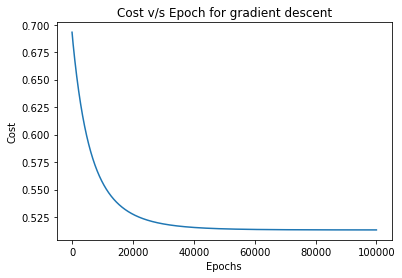

[[ 2.60075608]
 [-5.9983332 ]
 [-4.05468369]]
0.9166666666666666
[[ 2.60075608]
 [-5.9983332 ]
 [-4.05468369]]


In [91]:
theta2 = perform_descent(df2,0.01)
print(theta2)

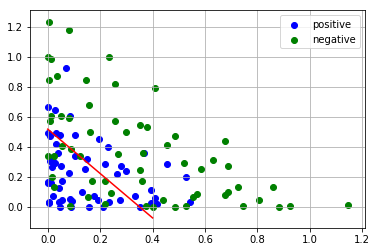

In [120]:
def forplot2(x, theta):
  return (0.5 - theta[0] - theta[1]*x)/theta[2]

x22 = np.linspace(0, 0.4, 20)
y22 = []
for i in x22:
  for j in forplot2(i, theta2):
    y22.append(j)


fig, ax = plt.subplots()
ax.scatter(Xpos2.loc[:]['x1'].values**2,Xpos2.loc[:]['x2'].values**2,c='blue',label='positive')
ax.scatter(Xneg2.loc[:]['x1'].values**2,Xneg2.loc[:]['x2'].values**2,c='green',label='negative')
ax.plot(x22,y22, c='red')
ax.legend()
ax.grid(True)
plt.show()

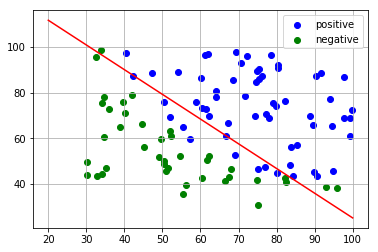

In [137]:
def forplot1(x, theta):
  return (0.5 - theta[0] - theta[1]*x)/theta[2]

x11 = np.linspace(20, 100, 20)
y11 = []
for i in x11:
  for j in forplot1(i, theta1):
    y11.append(j)

fig, ax = plt.subplots()
ax.scatter(Xpos.loc[:]['x1'].values,Xpos.loc[:]['x2'].values,c='blue',label='positive')
ax.scatter(Xneg.loc[:]['x1'].values,Xneg.loc[:]['x2'].values,c='green',label='negative')
ax.legend()
ax.grid(True)
ax.plot(x11,y11,c='red')
plt.show()


In [134]:
theta1

array([[-4.73435044],
       [ 0.04253026],
       [ 0.03922348]])

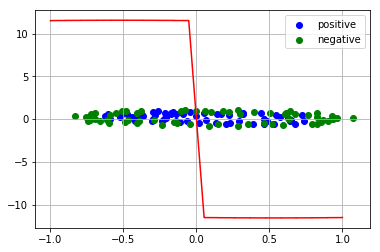

In [159]:
def forplot3(x, theta):
  a = (0.5 - theta[0])/theta[2]
  return a - (x**2)*theta[1]/theta[2]
  

x31 = np.linspace(-1, 1, 20)
y31 = []
y32 = []
yq = []
for i in x31:
  for j in forplot3(i, theta1):
    y31.append(np.sqrt(j))
    y32.append(-np.sqrt(j))
    yq.append(i)
    yq.append(i)

Xpos2 = df2.loc[df2['y']==1][['x1','x2']]
Xneg2 = df2.loc[df2['y']==0][['x1','x2']]
fig, ax = plt.subplots()
ax.scatter(Xpos2.loc[:]['x1'].values,Xpos2.loc[:]['x2'].values,c='blue',label='positive')
ax.scatter(Xneg2.loc[:]['x1'].values,Xneg2.loc[:]['x2'].values,c='green',label='negative')
ax.legend()
ax.plot(yq,y33,c='red')
ax.grid(True)
plt.show()

In [0]:
x31


In [0]:
y31

In [0]:
print(theta1)
thetaz = []
for i in theta1:
  if i<0:
    i=-i
  thetaz.append(np.sqrt(i))
thetaz

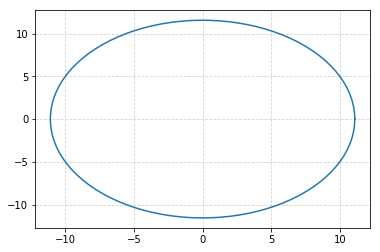

In [174]:
x1s = (0.5 - theta1[0])/theta1[1]
x2s = (0.5 - theta1[0])/theta1[2]

x1s = np.sqrt(x1s)
x2s = np.sqrt(x2s)

l1 = 2*x1s
l2 = 2*x2s
from math import pi
t = np.linspace(0, 2*pi, 100)
plt.plot( x1s*np.cos(t) , x2s*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [163]:
x1s

array([44.71844214])